Данная лабораторная работа ориентирована на знакомство с такими методами, как стратификация, кросс-валидация и различные алгоритмы подбора гиперпараметров для моделей машинного обучения с реализацией на языке программирования Python:

Продемонстрировать сохранение свойств исходного датасета при разбиении на тренировочную и тестовую (например, сохранения типа распределения) части для пользовательских и/или модельных данных.
Реализовать процедуру перекрестной проверки для пользовательских и/или модельных данных. Продемонстрировать процесс наглядно.
Для пользовательских и/или модельных данных реализовать сравнение скорости и точности результатов методов после применения перебора гиперпараметров по сетке, методом случайного поиска и с использованием байесовской оптимизации.

In [1]:
from sklearn.datasets import load_digits
X, y=load_digits(return_X_y=True, as_frame=True)

In [3]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

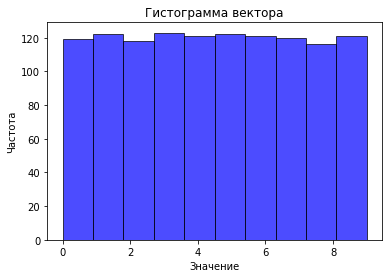

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_train=np.array(y_train)


plt.hist(y_train, bins=10, color='blue', edgecolor='black', alpha=0.7)


plt.title('Гистограмма вектора')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

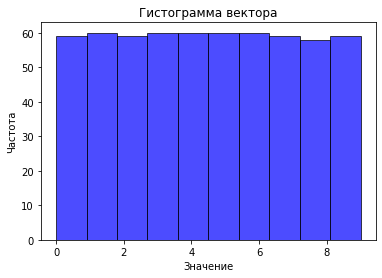

In [16]:


y_test=np.array(y_test)


plt.hist(y_test, bins=10, color='blue', edgecolor='black', alpha=0.7)


plt.title('Гистограмма вектора')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()
#Распределение классов осталось таким же 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [19]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kf = KFold(n_splits=10)
for k  in range(2, 20) :
    accuracies=[]
    neigh = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh.fit(X_train, y_train)
        accuracies.append(accuracy_score(neigh.predict(X_test), y_test))
    mean_accuracy=0
    for x in accuracies :
        mean_accuracy+=x
    mean_accuracy/=10
    print(f'k={k}      mean accuracy={mean_accuracy}')
#Для каждого значения гиперпараметра k считаю среднее значение accuracy на 10 фолдах

k=2      mean accuracy=0.9526939788950962
k=3      mean accuracy=0.9604872749844816
k=4      mean accuracy=0.9560335195530726
k=5      mean accuracy=0.9604934823091247
k=6      mean accuracy=0.9571508379888268
k=7      mean accuracy=0.9554872749844817
k=8      mean accuracy=0.9560335195530726
k=9      mean accuracy=0.9543637492240844
k=10      mean accuracy=0.951582867783985
k=11      mean accuracy=0.9499130974549969
k=12      mean accuracy=0.9487988826815641
k=13      mean accuracy=0.9454655493482308
k=14      mean accuracy=0.9449037864680323
k=15      mean accuracy=0.942129112352576
k=16      mean accuracy=0.9426877715704531
k=17      mean accuracy=0.9426908752327746
k=18      mean accuracy=0.9443544382371197
k=19      mean accuracy=0.9421322160148975


In [7]:
from sklearn.datasets import load_breast_cancer
X, y=load_breast_cancer(return_X_y=True, as_frame=True)

In [8]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
#Перебор гиперпараметров методом случайного поиска
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time
param_dist = {
    'n_estimators':[ 26, 31, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [45,  50, 55, 60],
    'min_samples_split': [ 10, 15, 20],
    'min_samples_leaf': [ 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2'],
    #'min_impurity_decrease' : uniform(0, 0.2),
    #'ccp_alpha' : uniform(0, 0.2)
}
dtree = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
start_time = time.time()
random_search.fit(X_train, y_train)
print("--- %s секунд ---" % (time.time() - start_time))
print("Лучшие параметры:", random_search.best_params_)
print("Лучшее качество модели:", random_search.best_score_)

--- 34.85407638549805 секунд ---
Лучшие параметры: {'n_estimators': 26, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 'log2', 'max_depth': 60, 'criterion': 'entropy'}
Лучшее качество модели: 0.9604395604395606


In [25]:
#Перебор гиперпараметров по сетке
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_estimators':[ 26, 31, 40],
    'criterion': ['gini', 'entropy'],
    'max_depth': [45,  50, 55, 60],
    'min_samples_split': [ 10, 15, 20],
    'min_samples_leaf': [ 15, 20, 25, 30],
    'max_features': ['sqrt', 'log2'],
    #'min_impurity_decrease' : uniform(0, 0.2),
    #'ccp_alpha' : uniform(0, 0.2)
}
dtree = RandomForestClassifier()
grid_search = GridSearchCV(dtree, param_dist, scoring='accuracy')
start_time = time.time()
grid_search.fit(X_train, y_train)
print("--- %s секунд ---" % (time.time() - start_time))
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее качество модели:", grid_search.best_score_)

--- 204.42699551582336 секунд ---
Лучшие параметры: {'criterion': 'gini', 'max_depth': 60, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 40}
Лучшее качество модели: 0.9604395604395606


In [17]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: PyYAML in c:\anaconda3\lib\site-packages (from optuna) (6.0)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [26]:
#перебор гиперпараметров с использованием байесовской оптимизации
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 26, 40)
    criterion = trial.suggest_categorical('criterion',  ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 45,  60)
    min_samples_split = trial.suggest_int('min_samples_split',10,  20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 15, 30)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
start_time = time.time()
study.optimize(objective, n_trials=100)
print("--- %s секунд ---" % (time.time() - start_time))
best_params = study.best_params
print("Лучшие гиперпараметры:", best_params)

[I 2024-01-11 22:36:43,634] A new study created in memory with name: no-name-6c5d6f93-0a9d-4b54-86ef-1c7aa0d45c1e
[I 2024-01-11 22:36:43,961] Trial 0 finished with value: 0.945054945054945 and parameters: {'n_estimators': 28, 'criterion': 'entropy', 'max_depth': 49, 'min_samples_split': 17, 'min_samples_leaf': 24, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.945054945054945.
[I 2024-01-11 22:36:44,351] Trial 1 finished with value: 0.9472527472527472 and parameters: {'n_estimators': 37, 'criterion': 'gini', 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 1 with value: 0.9472527472527472.
[I 2024-01-11 22:36:44,657] Trial 2 finished with value: 0.9428571428571428 and parameters: {'n_estimators': 27, 'criterion': 'entropy', 'max_depth': 55, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 1 with value: 0.9472527472527472.
[I 2024-01-11 22:36:45,075] Trial 3 finished with value: 0.9428

[I 2024-01-11 22:36:55,528] Trial 30 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 54, 'min_samples_split': 17, 'min_samples_leaf': 25, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:36:55,954] Trial 31 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 54, 'min_samples_split': 17, 'min_samples_leaf': 25, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:36:56,373] Trial 32 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 54, 'min_samples_split': 16, 'min_samples_leaf': 25, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:36:56,802] Trial 33 finished with value: 0.956043956043956 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 54, 'min_samples

[I 2024-01-11 22:37:08,399] Trial 60 finished with value: 0.9516483516483516 and parameters: {'n_estimators': 36, 'criterion': 'entropy', 'max_depth': 60, 'min_samples_split': 20, 'min_samples_leaf': 29, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:37:08,925] Trial 61 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 54, 'min_samples_split': 16, 'min_samples_leaf': 25, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:37:09,438] Trial 62 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 53, 'min_samples_split': 17, 'min_samples_leaf': 24, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:37:09,892] Trial 63 finished with value: 0.9582417582417582 and parameters: {'n_estimators': 38, 'criterion': 'entropy', 'max_depth': 54, 'min_sample

[I 2024-01-11 22:37:21,302] Trial 90 finished with value: 0.9516483516483516 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 53, 'min_samples_split': 17, 'min_samples_leaf': 29, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:37:21,717] Trial 91 finished with value: 0.956043956043956 and parameters: {'n_estimators': 38, 'criterion': 'entropy', 'max_depth': 54, 'min_samples_split': 14, 'min_samples_leaf': 25, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:37:22,130] Trial 92 finished with value: 0.956043956043956 and parameters: {'n_estimators': 37, 'criterion': 'entropy', 'max_depth': 56, 'min_samples_split': 13, 'min_samples_leaf': 24, 'max_features': 'log2'}. Best is trial 15 with value: 0.9582417582417582.
[I 2024-01-11 22:37:22,607] Trial 93 finished with value: 0.956043956043956 and parameters: {'n_estimators': 40, 'criterion': 'entropy', 'max_depth': 55, 'min_samples_s

--- 41.60099816322327 секунд ---
Лучшие гиперпараметры: {'n_estimators': 40, 'criterion': 'entropy', 'max_depth': 53, 'min_samples_split': 20, 'min_samples_leaf': 27, 'max_features': 'log2'}


In [27]:
print(study.best_value)

0.9582417582417582


In [ ]:
#скорость работы была лучше у случайного поиска, хотя у байесовской оптимизайии совсем немного медленнее, 
#при этом наилучшее качество модели совпадает у случайного поиска и поиска по сетке. Такая хорошая работа Random Search
#скорее всего обусловлена небольшой сеткой гиперпараметров, при более подробном переборе качество должно быть лучше у Grid Search